### Multi-Variate Linear Regression

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
#import sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
file_path='../Personal_Datasets/Humed-x_Dataset.csv'
df=pd.read_csv(file_path)
df.head(5)

,Patient ID,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI,Diagnosis,Treatment Plan,Recovery Status,Medication Type,Follow-up Requirement
0,101,65,130,250,72,28.0,Hypertension with high cholesterol.,"Medication: Lisinopril (blood pressure), Stati...",Active recovery.,"Lisinopril, Statins.",Quarterly.
1,102,42,110,150,76,24.0,Pre-hypertension.,"Lifestyle modification: Regular exercise, heal...",Recovered.,N/A.,Six months.
2,103,58,140,200,80,30.0,Type 2 Diabetes.,Medication: Metformin (blood sugar control). L...,Active recovery.,Metformin.,Quarterly.
3,104,71,160,220,88,32.0,Heart Failure.,"Medication: Digoxin (heart function), Furosemi...",Active recovery.,"Digoxin, Furosemide.",Monthly.
4,105,35,120,180,74,27.0,Overweight.,"Lifestyle modification: Regular exercise, heal...",Recovered.,N/A.,Three months.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient ID             100 non-null    int64  
 1   Age                    100 non-null    int64  
 2   Blood Pressure         100 non-null    int64  
 3   Cholesterol Levels     100 non-null    int64  
 4   Heart Rate             100 non-null    int64  
 5   BMI                    100 non-null    float64
 6   Diagnosis              100 non-null    object 
 7   Treatment Plan         100 non-null    object 
 8   Recovery Status        87 non-null     object 
 9   Medication Type        99 non-null     object 
 10  Follow-up Requirement  100 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 8.7+ KB


In [5]:
df.describe()

,Patient ID,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,107.480000,49.210000,126.100000,199.850000,79.380000,26.970000
std,4.678513,13.121264,15.018171,37.121524,7.947784,4.255015
min,101.000000,25.000000,95.000000,120.000000,60.000000,18.000000
25%,103.750000,39.750000,115.000000,177.500000,75.000000,24.000000
50%,107.000000,50.000000,125.000000,200.000000,80.000000,27.000000
75%,111.000000,60.000000,135.000000,226.250000,85.000000,30.000000
max,118.000000,75.000000,160.000000,300.000000,110.000000,40.000000


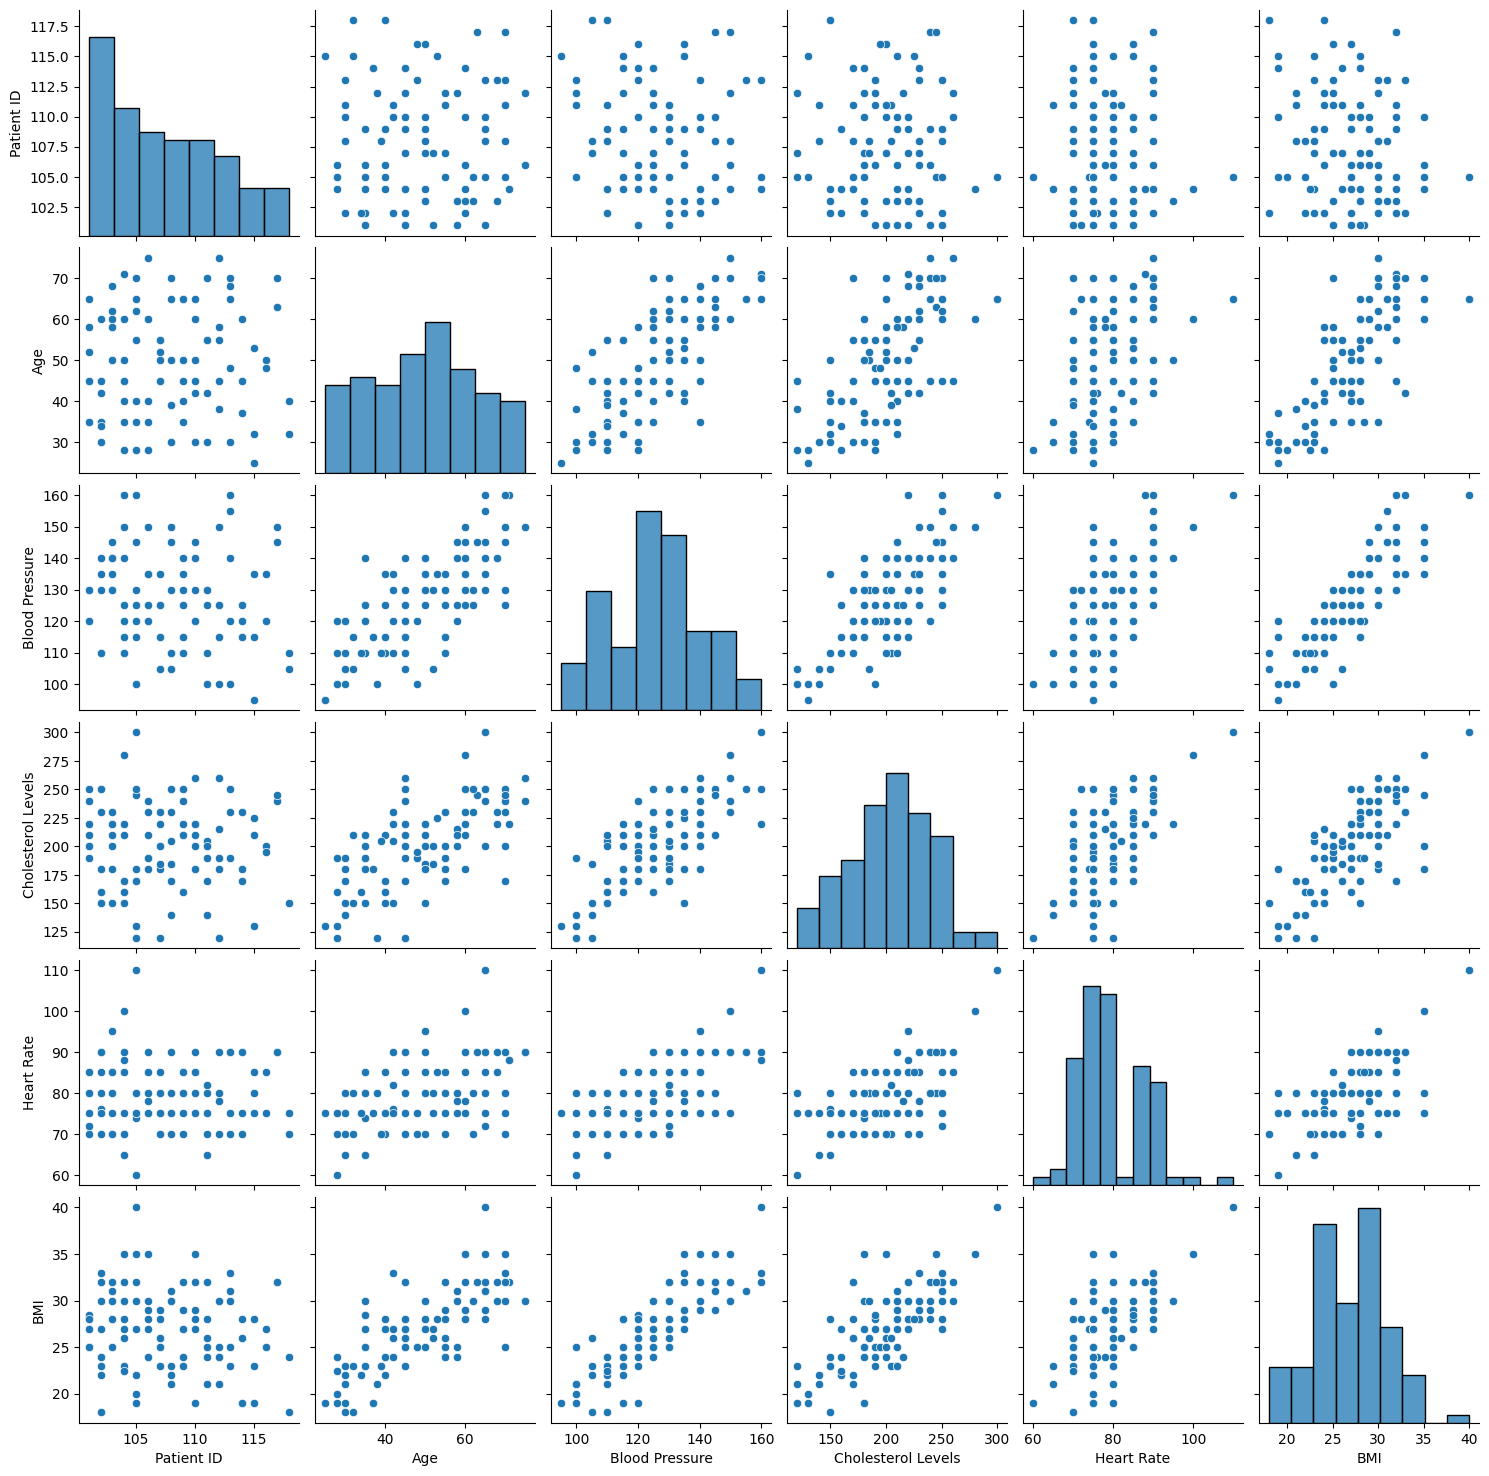

In [6]:
sns.pairplot(df)

In [12]:
X = df[[ 'Blood Pressure', 'Cholesterol Levels', 'Heart Rate', 'BMI']]
Y = df['Age']

In [13]:
X.head(5)

,Blood Pressure,Cholesterol Levels,Heart Rate,BMI
0,130,250,72,28.0
1,110,150,76,24.0
2,140,200,80,30.0
3,160,220,88,32.0
4,120,180,74,27.0


In [14]:
Y.head(5)

0    65
1    42
2    58
3    71
4    35
Name: Age, dtype: int64

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

In [16]:
lm1 = LinearRegression()
lm1.fit(x_train,y_train)

LinearRegression()

In [17]:
print(lm1.score(x_test,y_test))
print(lm1.intercept_)
coeff_df = pd.DataFrame(lm1.coef_,X.columns,columns=['Coefficient'])
coeff_df

0.5850961225068934
-6.398408046551786


,Coefficient
Blood Pressure,0.472842
Cholesterol Levels,0.099367
Heart Rate,-0.477827
BMI,0.522336


In [18]:
prediction = lm1.predict(x_test)
print(prediction)

[45.39910836 39.95188306 55.17411781 34.06463082 34.70750905 52.1907959
 40.17442875 41.47427353 52.56766657 49.82658476 47.36791002 25.55276596
 53.2105448  36.47345943 39.92696    45.04831635 34.30687092 46.97260888
 60.13471249 35.24953943 57.76610329 47.18227773 37.16733938 50.45207977
 67.21540802 58.37651861 45.92144434 51.19712566 45.42518702 54.8221702 ]


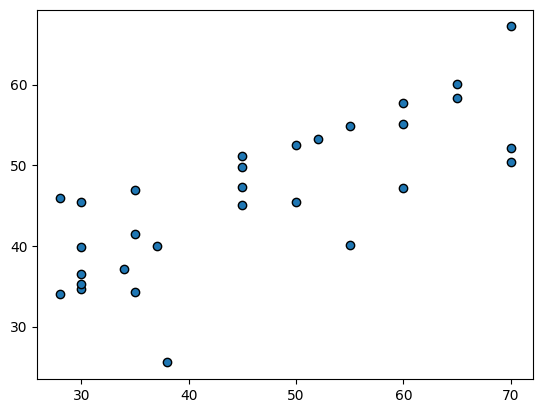

In [19]:
plt.scatter(y_test,prediction,edgecolor='black')

In [20]:
#Calculate the Mean Absolute Error, Mean Squared Error, Root Mean Squared Error to evaluate our model performance after importing metrics from sklearn.

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 7.058448932485101
MSE: 80.93207235242203
RMSE: 8.996225450288694


C:\Users\SUPRATIM NAG\AppData\Local\Temp\ipykernel_12400\2254374302.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction),bins=50,hist_kws=dict(edgecolor='black', linewidth=1))


<Axes: xlabel='Age', ylabel='Density'>

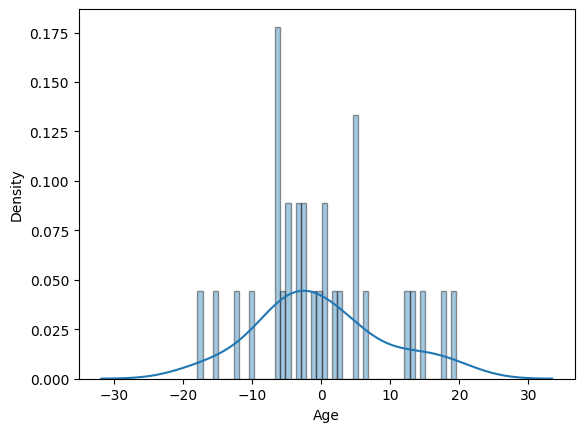

In [21]:
#Plot a Histogram of the residuals. [Use either seaborn distplot, or just plt.hist()]

sns.distplot((y_test-prediction),bins=50,hist_kws=dict(edgecolor='black', linewidth=1))